In [83]:
#import libs
import matplotlib.pyplot as plt

import plotly as py
import plotly.express as px

import pandas as pd
import numpy as np
import sklearn
from sklearn import linear_model
from sklearn.utils import shuffle

Task of competition is to predict whether a passenger was transported to an alternate dimension during the Spaceship Titanic's collision with the spacetime anomaly. 

Training data has been provided in the file train.csv - Personal records for about two-thirds (~8700) of the passengers, to be used as training data.

Testing data has been provided in the file test.csv - Personal records for the remaining one-third (~4300) of the passengers, to be used as test data. 

Your task is to predict the value of Transported for the passengers in this set.

In [84]:
train_data = pd.read_csv(r'C:\Users\krupa\OneDrive\Desktop\Titanic_ship_ML\data\train.csv')

train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [85]:
train_data.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [86]:
train_data.shape

(8693, 14)

In [87]:
train_data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [88]:
#check for missing values
print('missing values (%) per column: \n', 100*train_data.isnull().mean())

missing values (%) per column: 
 PassengerId     0.000000
HomePlanet      2.312205
CryoSleep       2.496261
Cabin           2.289198
Destination     2.093639
Age             2.059128
VIP             2.335212
RoomService     2.082135
FoodCourt       2.105142
ShoppingMall    2.392730
Spa             2.105142
VRDeck          2.162660
Name            2.300702
Transported     0.000000
dtype: float64


In [89]:
#overall percentage of missing values 
total_cells = np.product(train_data.shape)
missing_vals = train_data.isnull().sum()
total_missing_vals = missing_vals.sum()
percent_missing_vals = ((total_missing_vals/total_cells)*100).round(2)
print('Overall percentage of missing values in dataset: ', percent_missing_vals,'%')


Overall percentage of missing values in dataset:  1.91 %


In [90]:
train_data.shape

(8693, 14)

In [91]:
train_data.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [92]:
#non-int data

In [93]:
train_data['HomePlanet'].value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

In [94]:
train_data['CryoSleep'].value_counts()

False    5439
True     3037
Name: CryoSleep, dtype: int64

In [95]:
train_data['Cabin'].value_counts()

G/734/S     8
G/109/P     7
B/201/P     7
G/1368/P    7
G/981/S     7
           ..
G/556/P     1
E/231/S     1
G/545/S     1
G/543/S     1
F/947/P     1
Name: Cabin, Length: 6560, dtype: int64

In [96]:
train_data['Destination'].value_counts()

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

In [97]:
train_data['VIP'].value_counts()

False    8291
True      199
Name: VIP, dtype: int64

In [98]:
train_data = train_data.dropna()

In [99]:
train_data.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64

In [100]:
#change to dtype float32
#HomePlanet       object
#CryoSleep (bool)   object
#Cabin            object
#Destination      object
#VIP (bool)

mapping_dict1 = {'Earth':1, 'Europa':2, 'Mars':3}
train_data['HomePlanet'] = train_data['HomePlanet'].map(mapping_dict1)

mapping_dict3 = {'TRAPPIST-1e': 1, 'PSO J318.5-22': 2, '55 Cancri e': 3}
train_data['Destination'] = train_data['Destination'].map(mapping_dict3)

train_data['CryoSleep'] = train_data['CryoSleep'].astype('float32')
train_data['VIP'] = train_data['VIP'].fillna(0).astype('float32')


In [101]:
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,2,0.0,B/0/P,1,39.0,0.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,1,0.0,F/0/S,1,24.0,0.0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,2,0.0,A/0/S,1,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,2,0.0,A/0/S,1,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,1,0.0,F/1/S,1,16.0,0.0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [102]:
train_data.corr().style.background_gradient(cmap='Oranges')


,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
HomePlanet,1.000000,0.081138,-0.042933,0.140432,0.130006,0.224376,0.071919,0.116066,0.055204,0.040253,0.111806
CryoSleep,0.081138,1.000000,0.096612,-0.085701,-0.082303,-0.255398,-0.210782,-0.228612,-0.202216,-0.199095,0.462803
Destination,-0.042933,0.096612,1.000000,0.010014,0.043718,-0.055151,0.108887,-0.021464,0.057562,0.073714,0.123773
Age,0.140432,-0.085701,0.010014,1.000000,0.098138,0.074783,0.135844,0.042314,0.123820,0.105031,-0.082553
VIP,0.130006,-0.082303,0.043718,0.098138,1.000000,0.029009,0.135386,0.013660,0.064792,0.130061,-0.042260
RoomService,0.224376,-0.255398,-0.055151,0.074783,0.029009,1.000000,-0.013614,0.060478,0.012472,-0.026002,-0.247291
FoodCourt,0.071919,-0.210782,0.108887,0.135844,0.135386,-0.013614,1.000000,-0.012320,0.215995,0.216997,0.055025
ShoppingMall,0.116066,-0.228612,-0.021464,0.042314,0.013660,0.060478,-0.012320,1.000000,0.022168,0.000383,0.011602
Spa,0.055204,-0.202216,0.057562,0.123820,0.064792,0.012472,0.215995,0.022168,1.000000,0.149447,-0.219854
VRDeck,0.040253,-0.199095,0.073714,0.105031,0.130061,-0.026002,0.216997,0.000383,0.149447,1.000000,-0.207950


r-values greater than 0.7 indicate a strong correlation between two attributes. From the graph above, there doesn't appear to be any strong correlations. However, there seems to be link between the passengers who requested to be in cryo sleep and passengers who were transported, with an r-value of 0.46  

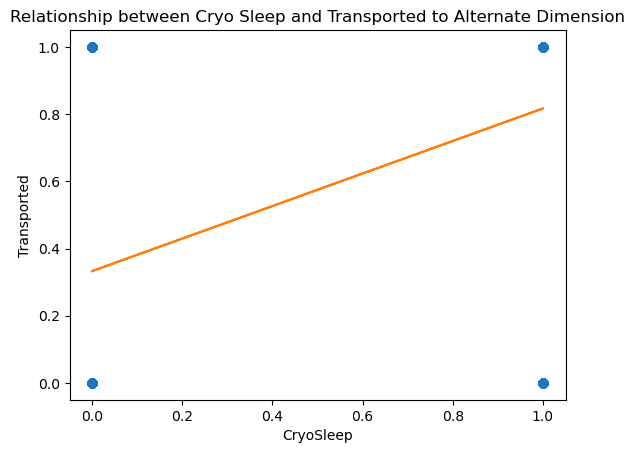

In [103]:
x = train_data['CryoSleep']
y = train_data['Transported']

plt.title('Relationship between Cryo Sleep and Transported to Alternate Dimension')
plt.xlabel('CryoSleep')
plt.ylabel('Transported')
plt.plot(x,y,'o')
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b)


Columns with integer values include:-
-Age
-Room Service (amount billed)
-Food Court (amount billed)
-Shopping mall (amount billed)
-Spa (amount billed)
-VR Deck (amount billed)


Non-integer value columns include:-
-PassengerId 
-HomePlanet
-CryoSleep
-Cabin 
-Destination
-VIP
-Name
-Transported


Let's take a look at each non-integer column in more detail. 

In [104]:
train_data['CryoSleep'].value_counts()

0.0    4274
1.0    2332
Name: CryoSleep, dtype: int64

In [105]:
train_data.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64

In [106]:
#select the column we want to predict (i.e. the prediction target)
y = train_data.Transported


In [107]:
#choose features (i.e. columns from data used to make predictions)
train_data_features = ['CryoSleep']

X = train_data[filt_train_data_features]

In [108]:
#review data to be used to predic transportation
X.describe()

,CryoSleep
count,6606.000000
mean,0.353012
std,0.477944
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [109]:
X.head()

,CryoSleep
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [110]:
y.describe()

count     6606
unique       2
top       True
freq      3327
Name: Transported, dtype: object

In [111]:
y.head()

0    False
1     True
2    False
3    False
4     True
Name: Transported, dtype: bool

In [112]:
X.isnull().sum()

CryoSleep    0
dtype: int64

In [113]:
y.isnull().sum()

0

In [114]:
y.shape

(6606,)

In [89]:
#building an ML model
#steps include
#1. define - what type of model 
#2. fit - find patterns from data provided
#3. predict 
#4. evaluate - determine accuracy of model using a metric


In [115]:
from sklearn.tree import DecisionTreeRegressor
#define model and specify a number for random_state to ensure same results each time

train_model = DecisionTreeRegressor(random_state=1)
#fit model
train_model.fit(X,y)


DecisionTreeRegressor(random_state=1)

In [116]:
X.head()

,CryoSleep
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [117]:
print(filt_train_model.predict(X.head()))

[0.33270941 0.33270941 0.33270941 0.33270941 0.33270941]


In [118]:
#using Mean Absolute Error (MAE) we can summarise the model quality

error = actual-predicted

NameError: name 'actual' is not defined

In [44]:
#we need a model to caluclate MAE 
filt_train_model = DecisionTreeRegressor()
#fit model
filt_train_model.fit(X,y)


DecisionTreeRegressor()

In [45]:
from sklearn.metrics import mean_absolute_error

predicted_outcome = filt_train_model.predict(X)
mean_absolute_error(y, predicted_outcome)

0.39288572435721275

array([0., 1., 0., ..., 1., 0., 1.])

The next question is, which data is important and will have an influence on our final prediction (attribute- Transported). 

In [28]:
test_data = pd.read_csv(r"C:\Users\krupa\OneDrive\Desktop\Titanic_ship_ML\data\test.csv")

test_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [29]:
test_data.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name'],
      dtype='object')